<img src='logo/dsl-logo.png' width="500" align="center" />

# HR Competition

## Decision Tree

Ein Entscheidungsbaum ist ein geordneter, gerichteter Baum. Durch die grafische Darstellung als Baumdiagramm werden hierarchisch aufeinanderfolgende Entscheidungen veranschaulicht. 

### Initializations

In [1]:
# benötigte Bibliotheken einbinden
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import tree
%matplotlib inline

In [2]:
# Definition einer Klasse für Text Styles
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [3]:
# Laden der Trainings- und Testdaten
X = np.load(file='exchange/hr_06_X.npy')
X_train = np.load(file='exchange/hr_06_X_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_test_scaled.npy')
y = np.load(file='exchange/hr_06_y.npy')
y_train = np.load(file='exchange/hr_06_y_train.npy')
y_test = np.load(file='exchange/hr_06_y_test.npy')

In [4]:
# Definition der Learning Curve-Methode
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

### Use Decision Tree

In diesem Fall jedoch, sind alle Werte bei 98%. Anhand der nachfolgenden Learning Curve lässt sich erkennen, dass das Modell zu 100%) auf die Trainingsdaten passt und der Testscore mit zunehmender Datensatzanzahl steigt. Dies bedeutet, dass weder ein Over- noch ein Underfitting vorliegt. 

In [5]:
# Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [6]:
# Score berechnen
clf.score(X_test_scaled, y_test)

0.96650000000000003

In [7]:
# Confusion Matrix und Classification Report erstellen
clf_predictions = clf.predict(X_test_scaled)

In [8]:
print(confusion_matrix(y_test, clf_predictions))

[[1497   39]
 [  28  436]]


In [9]:
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1536
          1       0.92      0.94      0.93       464

avg / total       0.97      0.97      0.97      2000



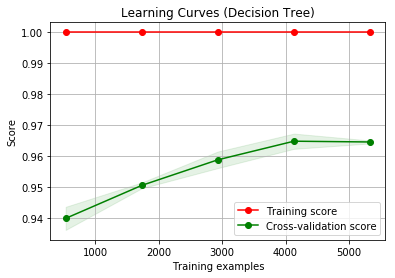

In [10]:
# Learning Curve berechnen
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

In diesem Fall jedoch, sind alle Werte bei 98%. Anhand der nachfolgenden Learning Curve lässt sich erkennen, dass das Modell zu 100%) auf die Trainingsdaten passt und der Testscore mit zunehmender Datensatzanzahl steigt. Dies bedeutet, dass weder ein Over- noch ein Underfitting vorliegt. 

#### Graphische Darstellung des Entscheidungsbaums

Vorteil des Entscheidungsbaumes ist die grafische Darstellung der Entscheidungsregeln. Dies erfordert die Installation der Bibliothek graphviz und pydotplus. 

In [11]:
#graphviz installieren 
!pip install graphviz
import graphviz

In [12]:
#Entscheidungsbaum exportieren
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')

In [13]:
graph = graphviz.Source('temp/tree.dot')

In [14]:
#pydotplus installieren
! pip install pydotplus

In [15]:
#weitere Bibliotheken importieren
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image

In [16]:
#Decision Tree anzeigen lassen
#dotfile = StringIO() 
#tree.export_graphviz(clf, out_file=dotfile) 
#pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree.png");
#print("Decision Tree Graph:")

<img src='temp/my_tree.png' width="100%" align="center" />

### Use Decision Tree w/o department

Im zuvor generierten Decision Tree ist zu erkennen, dass eine Vielzahl an Entscheidungsregeln genutzt werden. Um den den Baum zu schmälern sowie die durchzurechnenden Kombinationsmöglichkeiten zu reduzieren, wird im Folgenden die Spalte des Departments nicht mehr berücksichtigt. Die Wahl, das Department aus dem Datensatz rauszunehmen, ist darin begründet, dass bereits im Notebook 'bi_visual' festgestellt wurde, dass es voraussichtlich keinen bedeutenden Unterschied macht, in welchem Department der Mitarbeiter gearbeitet hat - die Verteilung der Kündigung ist ähnlich.

In [17]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [18]:
# Decision Tree initialisieren
clf = DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

In [19]:
# Score berechnen
clf.score(X_test_scaled, y_test)

0.97350000000000003

In [20]:
# Confusion Matrix und Classification Report erstellen
clf_predictions = clf.predict(X_test_scaled)

In [21]:
cm = confusion_matrix(y_test, clf_predictions)
print(cm)

[[1507   29]
 [  24  440]]


In [22]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1524,   12],
       [  26,  438]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1510,   26],
       [  26,  438]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [23]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'decision_tree':{'cm': cm, 'label': 'Decision Tree' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1524,   12],
       [  26,  438]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1507,   29],
       [  24,  440]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [24]:
# Classification Report erstellen
print(classification_report(y_test, clf_predictions))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1536
          1       0.94      0.95      0.94       464

avg / total       0.97      0.97      0.97      2000



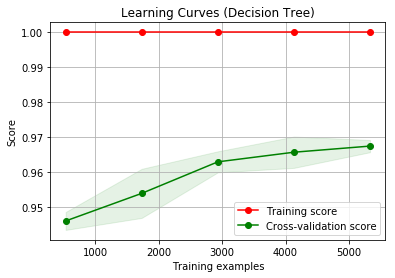

In [25]:
# Learning Curve berechnen
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Anhand des Scores sowie der Confusion Matrix lässt sich erkennen, dass die Werte sich durch das Rausnehmen des Department-Features gesteigert haben. Auch die Learning Curve konnte bei Hinzunahme aller Daten im Vergleich zur vorherigen Kurve gesteigert werden. Lediglich bei Berücksichtigung weniger Daten ist festzustellen, dass die Cross-Validation-Score-Kurve keine so hohe Steigerung aufzeigt wie die zuerst erstellte Learning Curve. 

#### Graphische Darstellung des Entscheidungsbaums

In [26]:
# Neuen Entscheidungsbaum exportieren
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')

In [27]:
graph = graphviz.Source('temp/tree.dot')

In [28]:
# Decision Tree anzeigen lassen
#dotfile = StringIO() 
#tree.export_graphviz(clf, out_file=dotfile) 
#pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree_wodept.png");
#print("Decision Tree Graph:")

<img src='temp/my_tree_wodept.png' width="100%" align="center" />

### Hyperparameter Tuning Using GridSearchCV

Im nächsten Abschnitt wird mit Hilfe von GridSearch Crossvalidation Hyperparameter Tuning durchgeführt. Dabei wird getestet, welche Parameter des Decision Tree-Algorithmus' am besten zu den gegebenen Daten passt. Dafür werden zunächst die Daten eingelesen und zu testende Parameter angegeben. Anschließend wird definiert, wie häufig die Crossvalidation angewendet werden soll, um daraufhin Aussagen treffen zu können. 

In [29]:
# Importieren weiterer Bibliotheken
from sklearn.model_selection import GridSearchCV

In [30]:
# Laden der Trainings- und Testdaten ohne das Feature Department
X = np.load(file='exchange/hr_06_X_wodept.npy')
X_train = np.load(file='exchange/hr_06_X_wodept_train.npy')
X_train_scaled = np.load(file='exchange/hr_06_X_wodept_train_scaled.npy')
X_test = np.load(file='exchange/hr_06_X_wodept_test.npy')
X_test_scaled = np.load(file='exchange/hr_06_X_wodept_test_scaled.npy')
y = np.load(file='exchange/hr_06_y_wodept.npy')
y_train = np.load(file='exchange/hr_06_y_wodept_train.npy')
y_test = np.load(file='exchange/hr_06_y_wodept_test.npy')

In [31]:
# Decision Tree initialisieren
clf = DecisionTreeClassifier()

In [32]:
# zu testende Parameter vorgeben
param_space = { 'criterion':['gini', 'entropy'], 'splitter':['best', 'random'], 'max_depth':[None, 5, 10, 20, 50]}

In [33]:
# Grid Search Crossvalidation definieren 
gs = GridSearchCV(clf, param_space, cv=10, n_jobs=-1)

In [34]:
# Modelle erstellen
gs.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 'max_depth': [None, 5, 10, 20, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

C:\Users\IBM_ADMIN\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


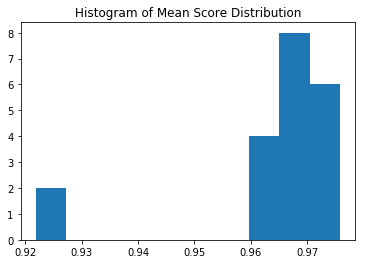

In [35]:
# Histogramm erstellen
scores = pd.DataFrame(gs.grid_scores_)
plt.hist(scores['mean_validation_score'], bins=10)
plt.title('Histogram of Mean Score Distribution');

In [36]:
# besten Modellscore ausgeben
gs.best_score_

0.97587500000000005

In [37]:
# beste Parameterkombination ausgeben
gs.best_params_

{'criterion': 'gini', 'max_depth': 10, 'splitter': 'best'}

In [38]:
# Decision Tree mit bester Parameterkombination initialisieren
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, splitter='best')

In [39]:
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [40]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.97999999999999998

In [41]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [42]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1520   16]
 [  24  440]]


In [43]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.986625
Test Accuracy  ::  0.98


In [44]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1524,   12],
       [  26,  438]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1507,   29],
       [  24,  440]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [45]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'random_forest':{'cm': cm, 'label': 'Random Forest' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1507,   29],
       [  24,  440]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [46]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1536
          1       0.96      0.95      0.96       464

avg / total       0.98      0.98      0.98      2000



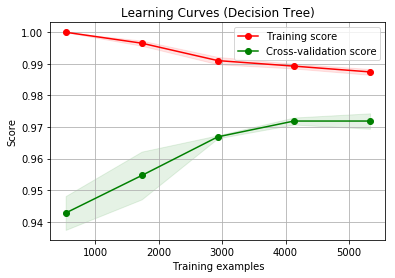

In [47]:
# Learning Curve berechnen
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Die Werte der Confusion Matrix sowie des Scores zeigen erneut, dass das Modell optimiert werden konnte. Das Hyperparameter Tuning war somit von Erfolg. Allerdings ist in der Abbildung der Learning Curve auffällig, dass die Linie des Training Scores mit steigender Datensatzanzahl fällt. Eine mögliche Begründung ist die Limitierung der maximalen Baumtiefe auf 10. Durch das Hyperparameter Tuning wurde vorgeschlagen, das Modell auf diese Baumtiefe zu begrenzen, um ein Overfitting zu vermeiden. Somit konnten nicht alle Trainingsdaten korrekt eingeordnet werden, der Cross-Validation-Score konnte jedoch gesteigert werden. 

#### Graphische Darstellung des Entscheidungsbaums

In [48]:
# Neuen Entscheidungsbaum exportieren
dot_data = tree.export_graphviz(clf, out_file='temp/tree.dot')

In [49]:
graph = graphviz.Source('temp/tree.dot')

In [50]:
! pip install pydotplus

In [51]:
# weitere Bibliotheken importieren
from sklearn.externals.six import StringIO  
import pydotplus
from IPython.display import Image

In [52]:
# Decision Tree anzeigen lassen
#dotfile = StringIO() 
#tree.export_graphviz(clf, out_file=dotfile) 
#pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png("temp/my_tree_tuned.png");
#print("Decision Tree Graph:")

<img src='temp/my_tree_tuned.png' width="100%" align="center" />

Das hier angezeigte Baumdiagramm hat im Vergleich zu den beiden vorherigen auf Grund der Limitierung auf die maximale Baumtiefe und der weiteren Optimierung der Algorithmusparameter weniger Entscheidungsknoten. 

### Feature Selection for Decision Tree

Im nächsten Abschnitt wird evaluiert, welche Features in Kombination die besten Ergebnisse liefern. Dafür werden systematisch einzelne Features bei der Modellerstellung ignoriert. Anschließend werden die Ergebnisse der einzelnen Modelle aufgelistet. Diese Feature Selection ermöglicht es, nachfolgend die irrelevanten Spalten aus dem Datenset rauszunehmen und somit ein optimiertes Modell zu erstellen. 

In [53]:
# weitere Bibliotheken importieren
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from IPython.display import clear_output
import itertools as it

In [54]:
dff = pd.read_pickle('exchange/hr_01_cleaned_train.pkl')
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
satisfactionLevel       10000 non-null float64
yearsSinceEvaluation    10000 non-null float64
numberOfProjects        10000 non-null int64
averageMonthlyHours     10000 non-null int64
yearsAtCompany          10000 non-null int64
workAccident            10000 non-null category
hasLeftCompany          10000 non-null category
gotPromotion            10000 non-null category
department              10000 non-null category
salary                  10000 non-null category
dtypes: category(5), float64(2), int64(3)
memory usage: 439.7 KB


In [55]:
# Datentyp von Category in Object umwandeln
for col in dff.select_dtypes(['category']):
    print('transforming', col)
    dff[col] = dff[col].astype('str')

transforming workAccident
transforming hasLeftCompany
transforming gotPromotion
transforming department
transforming salary


In [56]:
# Features in List umwandeln und ausgeben
columns = list(dff.columns)
columns.remove('hasLeftCompany')
columns

['satisfactionLevel',
 'yearsSinceEvaluation',
 'numberOfProjects',
 'averageMonthlyHours',
 'yearsAtCompany',
 'workAccident',
 'gotPromotion',
 'department',
 'salary']

In [57]:
# Länge der Liste
len(columns)

9

In [58]:
# Anzahl der Kombinationen, wenn 0, 1, 2, 3 oder 4 Features rausnimmt
for i in range(0,5):
    print(len(set(it.combinations(columns,i))))

1
9
36
84
126


In [59]:
# Kombination der Features, die nicht berücksichtigt werden und Ausgabe der Scores 
results = pd.DataFrame([], columns=['combination', 'score'])
for i in range(0,4):
    combinations = set(it.combinations(columns,i))
    for idx, comb in enumerate(combinations):
        print()
        print('calculating... combinations with ' + str(i) + ' elements :: ' + str(idx + 1) + ' of ' + str(len(combinations)))
        comb = list(comb)
        comb.append('hasLeftCompany')
        df = pd.get_dummies(dff.drop(comb, axis=1)).join(dff[['hasLeftCompany']])
        y = df['hasLeftCompany'].values
        X = df.drop(['hasLeftCompany'], axis=1).values
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        clf = DecisionTreeClassifier()
        scores = cross_val_score(clf, X_train_scaled, y_train, cv=10, n_jobs=-1)
        results = results.append(pd.DataFrame([[','.join(comb), scores.mean()]], columns=results.columns))
        clear_output()
        print(color.BOLD + 'best scores so far:' + color.END)
        print(results.sort_values('score', ascending=False).head(5))

best scores so far:
                                         combination     score
0                 workAccident,salary,hasLeftCompany  0.973499
0    workAccident,gotPromotion,salary,hasLeftCompany  0.973124
0         yearsSinceEvaluation,salary,hasLeftCompany  0.972500
0  yearsSinceEvaluation,gotPromotion,salary,hasLe...  0.972375
0           workAccident,gotPromotion,hasLeftCompany  0.971875


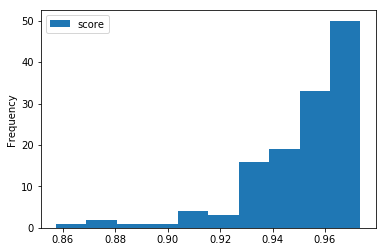

In [60]:
# Ausgabe der Scores als Diagramm
results.plot.hist();

In [61]:
# Ausgabe der kombinierten Features sortiert nach Score - besten Kombinationen
results.sort_values('score', ascending=False).head(10)

,combination,score
0,"workAccident,salary,hasLeftCompany",0.973499
0,"workAccident,gotPromotion,salary,hasLeftCompany",0.973124
0,"yearsSinceEvaluation,salary,hasLeftCompany",0.972500
0,"yearsSinceEvaluation,gotPromotion,salary,hasLe...",0.972375
0,"workAccident,gotPromotion,hasLeftCompany",0.971875
0,"yearsSinceEvaluation,workAccident,salary,hasLe...",0.971750
0,"workAccident,gotPromotion,department,hasLeftCo...",0.971750
0,"workAccident,department,salary,hasLeftCompany",0.971750
0,"yearsSinceEvaluation,workAccident,hasLeftCompany",0.971626
0,"gotPromotion,salary,hasLeftCompany",0.971624


In [62]:
# Ausgabe der ignorierten kombinierten Features sortiert nach Score - schlechtesten Kombinationen
results.sort_values('score', ascending=False).tail(10)

,combination,score
0,"satisfactionLevel,yearsAtCompany,salary,hasLef...",0.924250
0,"yearsSinceEvaluation,numberOfProjects,yearsAtC...",0.915123
0,"numberOfProjects,averageMonthlyHours,yearsAtCo...",0.914750
0,"satisfactionLevel,yearsSinceEvaluation,average...",0.910999
0,"yearsSinceEvaluation,averageMonthlyHours,years...",0.905751
0,"satisfactionLevel,averageMonthlyHours,yearsAtC...",0.893498
0,"satisfactionLevel,yearsSinceEvaluation,yearsAt...",0.892126
0,"satisfactionLevel,numberOfProjects,yearsAtComp...",0.879123
0,"satisfactionLevel,yearsSinceEvaluation,numberO...",0.873373
0,"satisfactionLevel,numberOfProjects,averageMont...",0.857496


In [89]:
# Features mit geringem Einfluss auf Modell rausnehmen und Trainings- und Testdataframes erstellen
df = pd.get_dummies(dff.drop(['workAccident','salary','hasLeftCompany'], axis=1)).join(dff[['hasLeftCompany']])
y = df['hasLeftCompany'].values
X = df.drop(['hasLeftCompany'], axis=1).values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
# Decision Tree mit bester Parameterkombination initialisieren
clf = DecisionTreeClassifier(criterion='gini', max_depth=10, splitter='best')
clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [94]:
# Score ausgeben
clf.score(X_test_scaled, y_test)

0.98099999999999998

In [95]:
# Confusion Matrix erstellen
predictions = clf.predict(X_test_scaled)

In [96]:
cm = confusion_matrix(y_test, predictions)
print(cm)

[[1522   14]
 [  24  440]]


In [97]:
# Train und Test Accuracy ausgeben
print("Train Accuracy :: ", accuracy_score(y_train, clf.predict(X_train_scaled)))
print("Test Accuracy  :: ", accuracy_score(y_test, predictions))

Train Accuracy ::  0.98675
Test Accuracy  ::  0.981


In [98]:
# Laden der Dictionary-Datei
cm_dict = np.load("exchange/hr_20_cm_dict.npy")
print(cm_dict.item())

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1507,   29],
       [  22,  442]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [99]:
# Aktualisieren der Werte der Confusion Matrix und exportieren der Ergebnisse
cm_dict.item().update({'decision_tree':{'cm': cm, 'label': 'Decision Tree' }})
print(cm_dict)
np.save("exchange/hr_20_cm_dict.npy", cm_dict)

{'neural_net': {'cm': array([[1809,   38],
       [  22,  531]], dtype=int64), 'label': 'Neural Network'}, 'random_forest': {'cm': array([[1520,   16],
       [  24,  440]], dtype=int64), 'label': 'Random Forest'}, 'logistic_regression': {'cm': array([[1421,  115],
       [ 306,  158]], dtype=int64), 'label': 'Logistic Regression'}, 'decision_tree': {'cm': array([[1522,   14],
       [  24,  440]], dtype=int64), 'label': 'Decision Tree'}, 'svm': {'cm': array([[1471,   65],
       [ 108,  356]], dtype=int64), 'label': 'Support Vector Machine'}, 'deep_neural_net': {'cm': array([[1822,   25],
       [ 140,  413]], dtype=int64), 'label': 'Deep Neural Network'}, 'nearest_neighbor': {'cm': array([[1504,   32],
       [  26,  438]], dtype=int64), 'label': 'Nearest Neighbor'}, 'gradient_boost': {'cm': array([[1841,    6],
       [  17,  536]], dtype=int64), 'label': 'Gradient Boost'}}


In [100]:
# Classification Report erstellen
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1536
          1       0.97      0.95      0.96       464

avg / total       0.98      0.98      0.98      2000



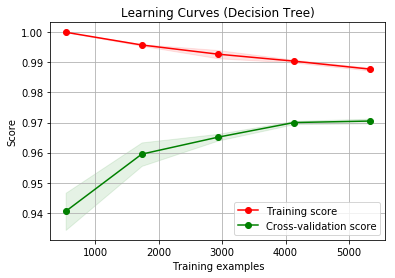

In [101]:
# Learning Curve berechnen
title = 'Learning Curves (Decision Tree)'
estimator = clf
plot_learning_curve(estimator, title, X_train_scaled, y_train)
plt.show()

Die Feature Selection mit den aus dem Hyperparameter Tuning gewählten Parametern ergibt ein optimiertes Modell, sodass die Werte des Scores und des Classification Reports erneut gesteigert werden konnten.